# 50 Startups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, r2_score, mean_squared_error,confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
startup = pd.read_csv('./Downloads/50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
startup.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [5]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [3]:
startup = startup.rename({'R&D Spend':'RnD_spend',
                        'Marketing Spend':'Marketing_spend'},
                        axis =1)
startup

,RnD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


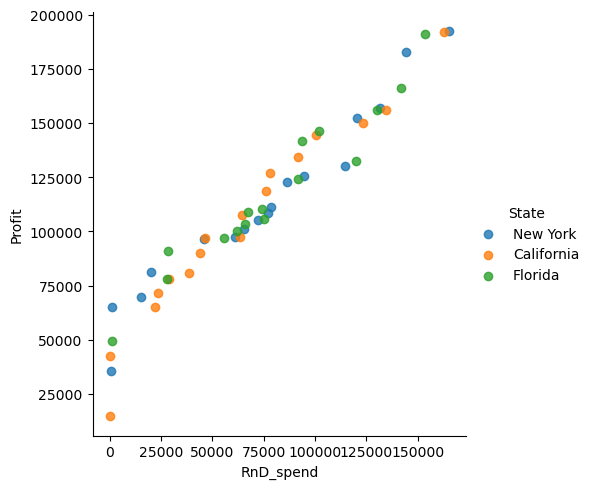

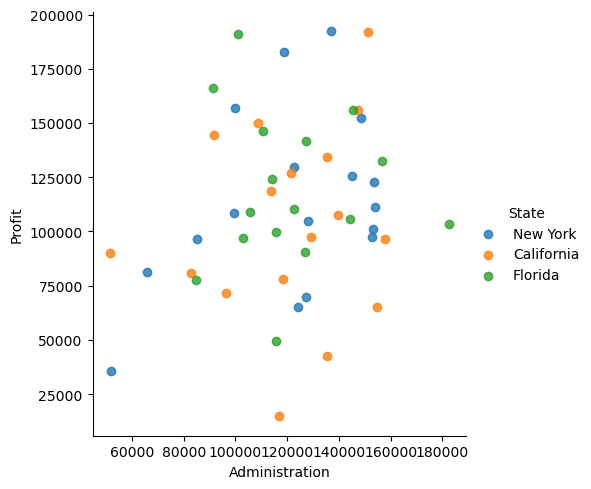

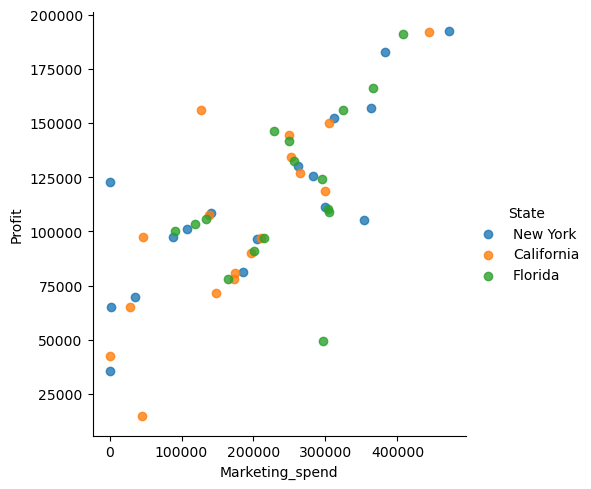

In [4]:
# Plotting

sns.lmplot(x = 'RnD_spend', y = 'Profit', data = startup, hue = 'State', fit_reg = False)
# sns.title('R&D spend vs Profit')

sns.lmplot(x = 'Administration', y = 'Profit', data = startup, hue = 'State', fit_reg = False)
# sns.title('Administration vs Profit')

sns.lmplot(x = 'Marketing_spend', y = 'Profit', data = startup, hue = 'State', fit_reg = False)
# sns.title('Marketing spend vs Profit')



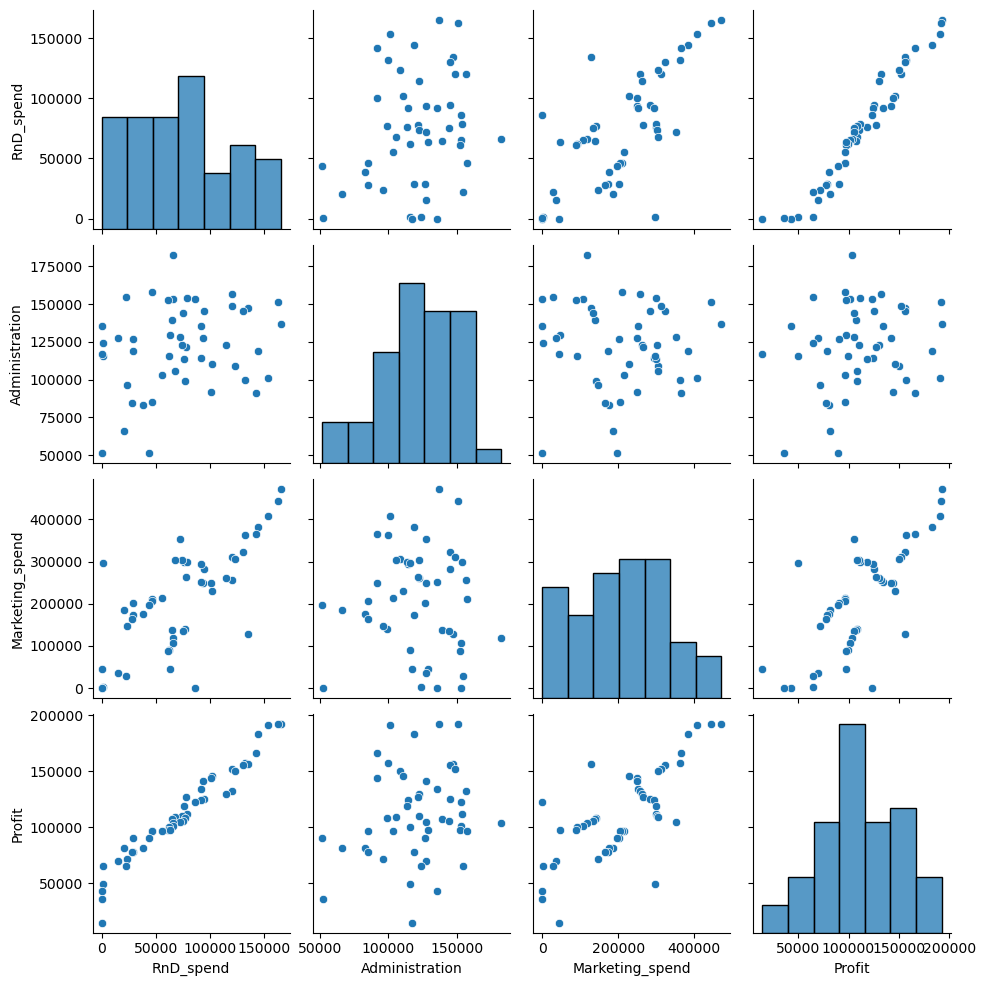

In [5]:
sns.pairplot(startup)

In [6]:
# Training & Testing
x_train,x_test,y_train,y_test = train_test_split(startup.loc[:,'RnD_spend':'Marketing_spend'], startup['Profit'], test_size = 0.3, random_state = 1)

In [7]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# print(y_pred)
r2_score(y_test,y_pred)

0.9535462194580043

# Model : Linear Regression

In [13]:
import statsmodels.formula.api as smf
model1 = smf.ols('Profit~RnD_spend+Administration+Marketing_spend', data = startup).fit()
print(model1.summary())
model1.rsquared
# model1.predict(new)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        00:01:08   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353     

0.9507459940683246

In [14]:
model1r = smf.ols('Profit~RnD_spend',data=startup).fit()
print(model1r.summary())
model1r.rsquared

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           3.50e-32
Time:                        00:01:13   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.0

0.9465353160804392

In [15]:
model1a = smf.ols('Profit~Administration',data=startup).fit()
print(model1a.summary())
model1a.rsquared

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 23 Apr 2023   Prob (F-statistic):              0.162
Time:                        00:01:17   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.

0.04028714077757245

In [16]:
model1m = smf.ols('Profit~Marketing_spend',data=startup).fit()
print(model1m.summary())
model1m.rsquared

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           4.38e-10
Time:                        00:01:20   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530     

0.5591535746115515

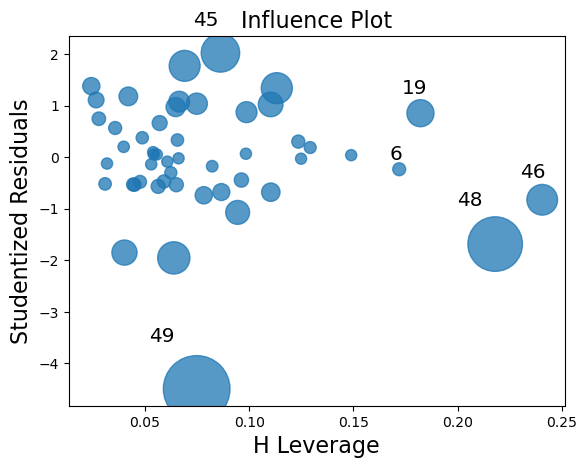

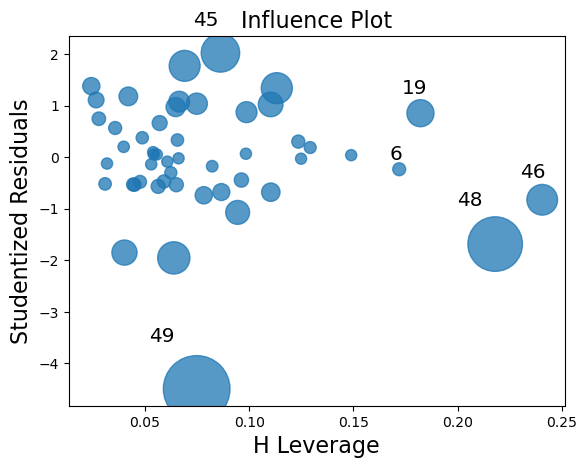

In [17]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

eval_env: 1


<Figure size 1500x800 with 0 Axes>

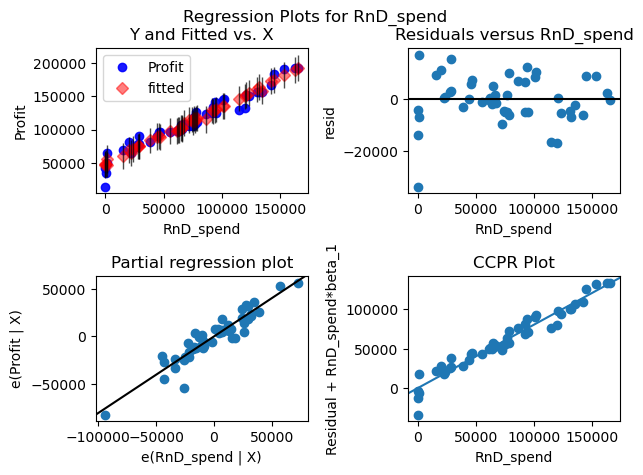

In [19]:
# Testing for errors

import statsmodels.api as sm
plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model1,'RnD_spend')
plt.show()

eval_env: 1


<Figure size 1500x800 with 0 Axes>

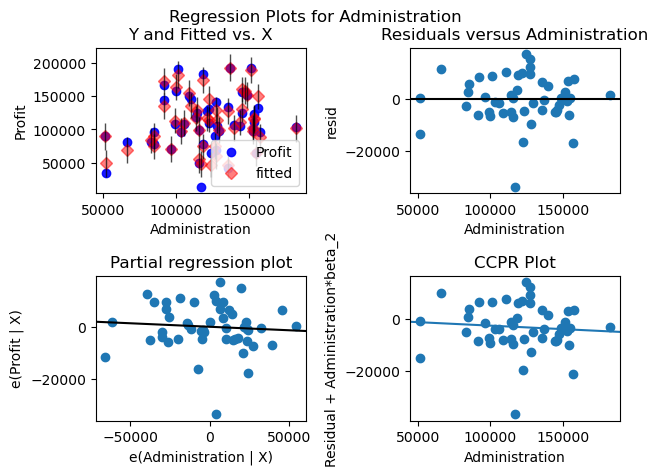

In [20]:
plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model1,'Administration')
plt.show()

eval_env: 1


<Figure size 1500x800 with 0 Axes>

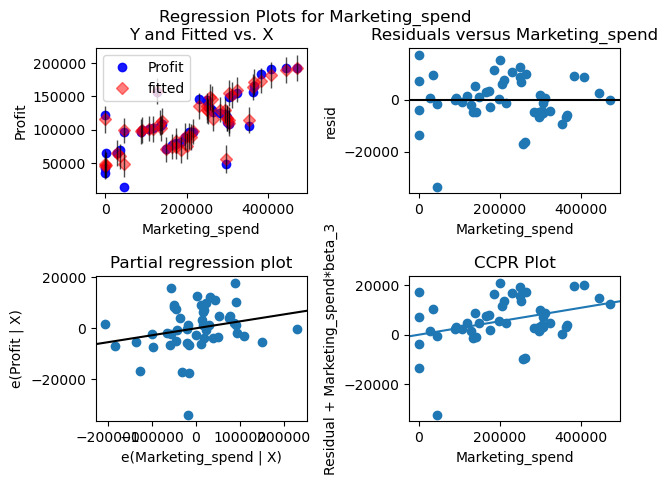

In [21]:
plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model1,'Marketing_spend')
plt.show()

In [ ]:
plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(model1,'RnD_spend')
plt.show()

# Model Detection using Cook's distance

In [22]:
# Condition for outlier : if cook's distance > 1

(c,_) = model1.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

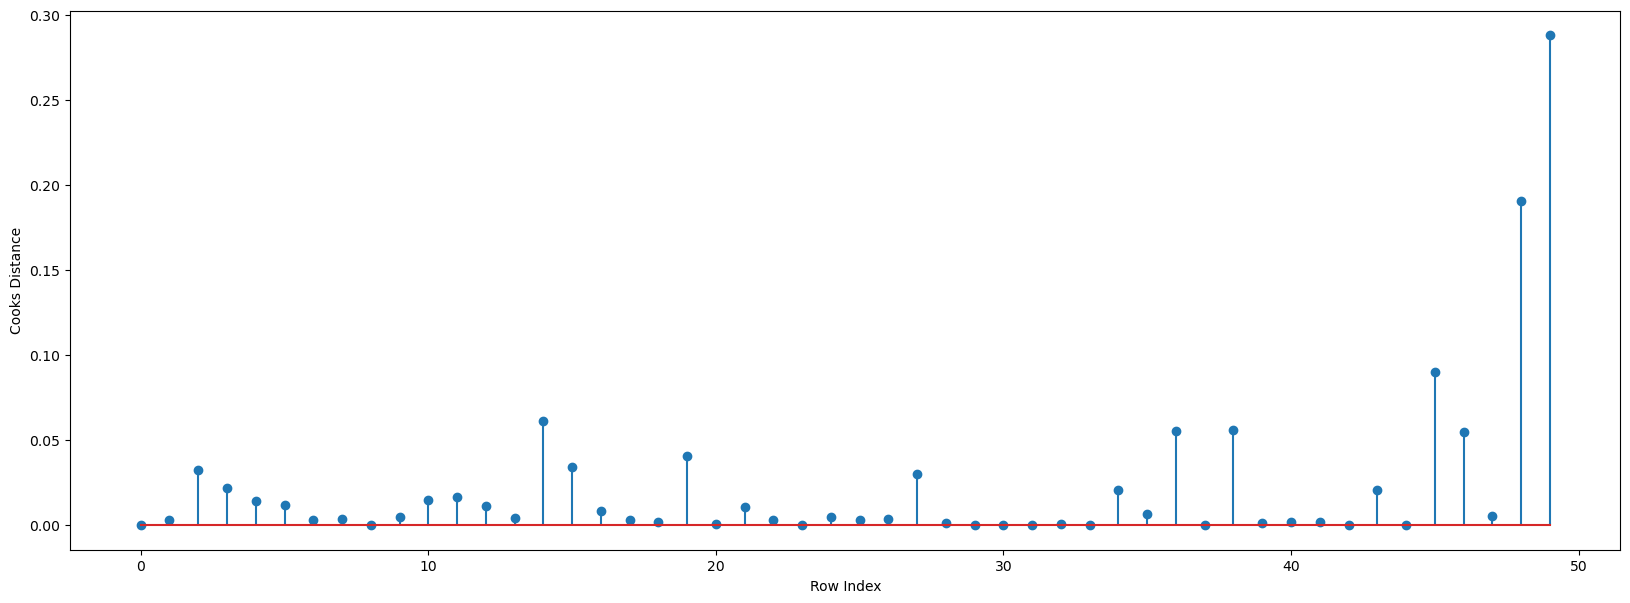

In [23]:
# Plotting the influencers using stem plot

plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

In [25]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [32]:
startup1 = startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
startup1

,RnD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
# Improving model accuracy by detecting outliers

while np.max(c)>0.5 :
    model1=smf.ols("Profit~RnD_spend+Administration+Marketing_spend",data=startup1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    startup=startup.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startup
else:
    final_model=smf.ols("Profit~RnD_spend+Administration+Marketing_spend",data=startup1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [35]:
final_model.rsquared

0.9613162435129847

In [35]:
# Predicting the values
profit_pred = model1.predict(x_test)
r2_score(y_test,profit_pred)

0.958182134516819

In [36]:
# R2_score table

d = {'Prep_Models':['model1','model1r','model1a','model1m','final_model'],'Rsquared':[model1.rsquared,model1r.rsquared,model1a.rsquared,model1m.rsquared, final_model.rsquared]}

table = pd.DataFrame(d)
table

,Prep_Models,Rsquared
0,model1,0.950746
1,model1r,0.946535
2,model1a,0.040287
3,model1m,0.559154
4,final_model,0.961316


In [38]:
final_model.predict(x_test)

27    114916.165026
35     91709.288672
40     76625.510303
38     71433.021956
2     180575.526396
3     172461.144642
48     51658.096812
29    103057.621761
46     58338.443625
31     99088.213693
32    100325.741335
39     85147.375646
21    117911.019038
36     77080.554255
19    116641.003121
dtype: float64

In [92]:
# Prediction by using final model

RnDspend = int(input('Enter R&D spend : '))
administration = int(input('Enter administration : '))
mar_spend = int(input('Enter marketing spend : '))

new = pd.DataFrame({'RnD_spend':RnDspend , 'Administration':administration, 'Marketing_spend': mar_spend},index = [0])
print(new)

pred_profit = final_model.predict(new)
print('=='*30)
print(f'The predicted profit is {pred_profit}')

Enter R&D spend : 75000
Enter administration : 83000
Enter marketing spend : 121000
   RnD_spend  Administration  Marketing_spend
0      75000           83000           121000
The predicted profit is 0    112318.134799
dtype: float64


# 

# Toyota

In [42]:
import pandas as pd
import seaborn as sns

toyota = pd.read_csv('./Downloads/ToyotaCorolla.csv', encoding = 'unicode_escape')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [43]:
del toyota['Id']
toyota.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [5]:
toyota.columns

Index(['Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [25]:
toyota.isnull().sum()

Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [44]:
toyota.describe()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


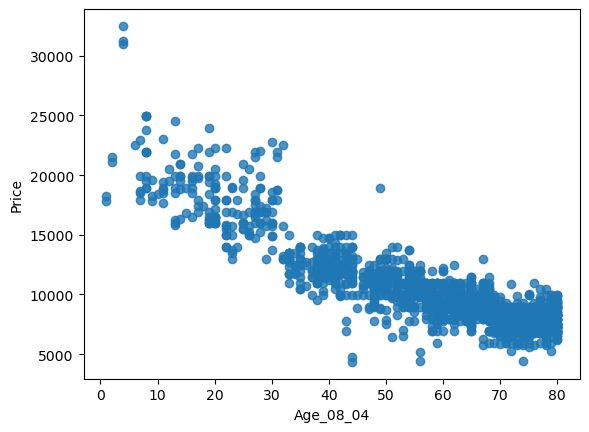

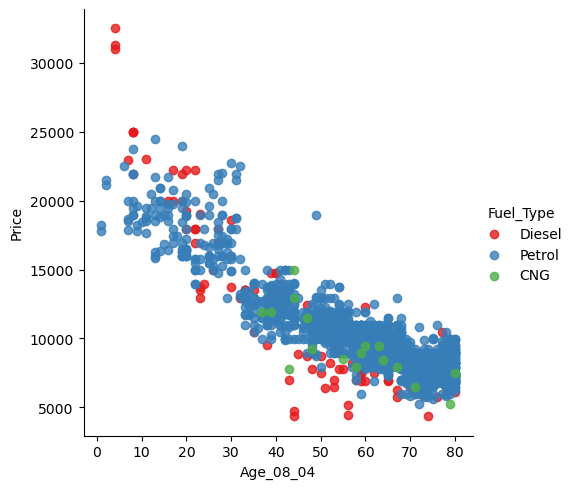

In [45]:
sns.regplot(x = 'Age_08_04', y = 'Price', data = toyota,fit_reg = False)
sns.lmplot(x = 'Age_08_04', y = 'Price', data = toyota, hue = 'Fuel_Type', legend = True,fit_reg = False, palette = 'Set1')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

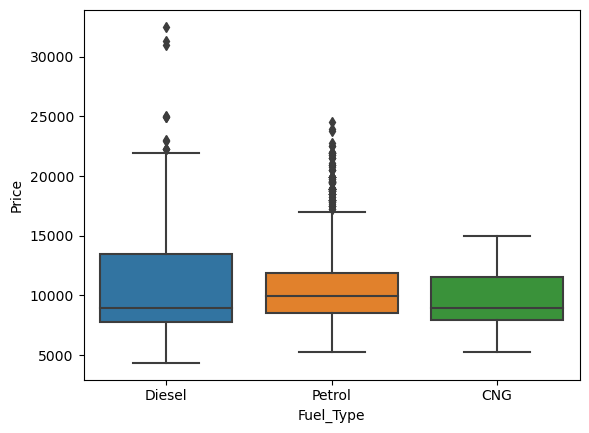

In [28]:
# Bar plot using sns

# sns.countplot(x="Fuel_Type", data=toyota, hue="Automatic")

# sns.boxplot(y=toyota["Price"])   #box whiskers plot

sns.boxplot(x=toyota['Fuel_Type'],y=toyota['Price'])

# Modeling

In [75]:
toyota.columns.unique()

Index(['Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [63]:
import statsmodels.formula.api as smf

modelt=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()
print(modelt.summary())
modelt.rsquared

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:49:32   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949

0.8637627463428192

In [30]:
modelt.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [64]:
import numpy as np

t = modelt.tvalues 
p = np.round(modelt.pvalues,5)
print(t)
print('==='*20)
print(p)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64
Intercept        0.00008
Age_08_04        0.00000
KM               0.00000
HP               0.00000
cc               0.17909
Doors            0.96777
Gears            0.00261
Quarterly_Tax    0.00262
Weight           0.00000
dtype: float64


In [49]:
modelcc=smf.ols('Price~cc',data=toyota).fit()
modelcc.tvalues , modelcc.pvalues

(Intercept    24.694090
 cc            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64)

In [50]:
modeldd=smf.ols('Price~Doors',data=toyota).fit()
print(modeldd.summary())
modeldd.tvalues , modeldd.pvalues

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.46e-12
Time:                        00:45:58   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.0

(Intercept    19.258097
 Doors         7.141657
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [51]:
model_cd=smf.ols('Price~cc+Doors',data=toyota).fit()
print(model_cd.summary())
model_cd.tvalues , model_cd.pvalues

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.15e-15
Time:                        00:46:02   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.0

(Intercept    12.620704
 cc            4.340400
 Doors         6.816153
 dtype: float64,
 Intercept    1.056885e-34
 cc           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

In [65]:
modelt.resid

0      -2267.041468
1      -1523.694807
2      -1692.792449
3       -349.532796
4      -1840.527364
           ...     
1431   -1984.221454
1432    2521.012215
1433      25.581843
1434   -1524.663480
1435   -2280.571886
Length: 1436, dtype: float64

eval_env: 1


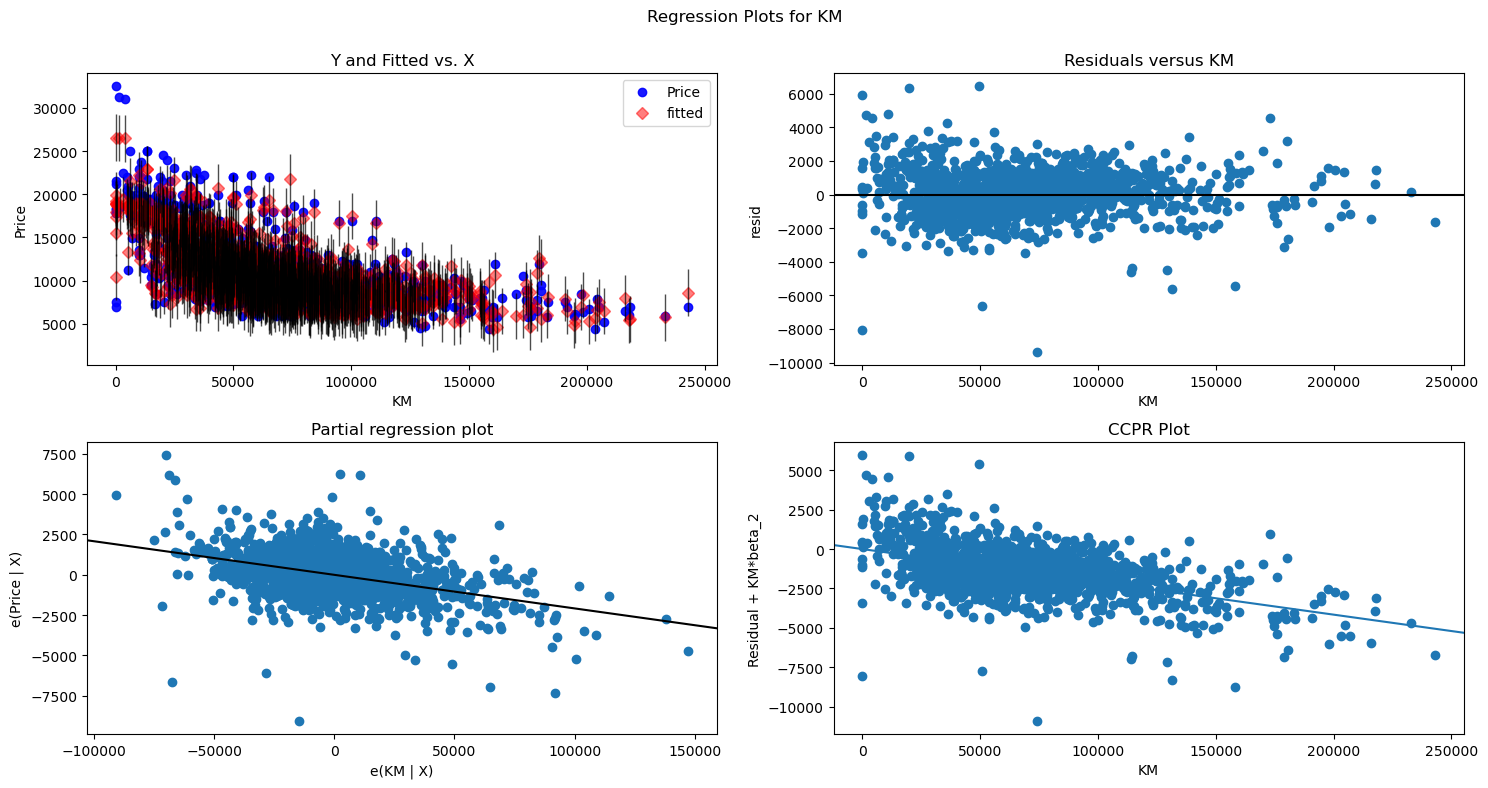

In [65]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(modelt,'KM',fig=fig)
plt.show()

eval_env: 1


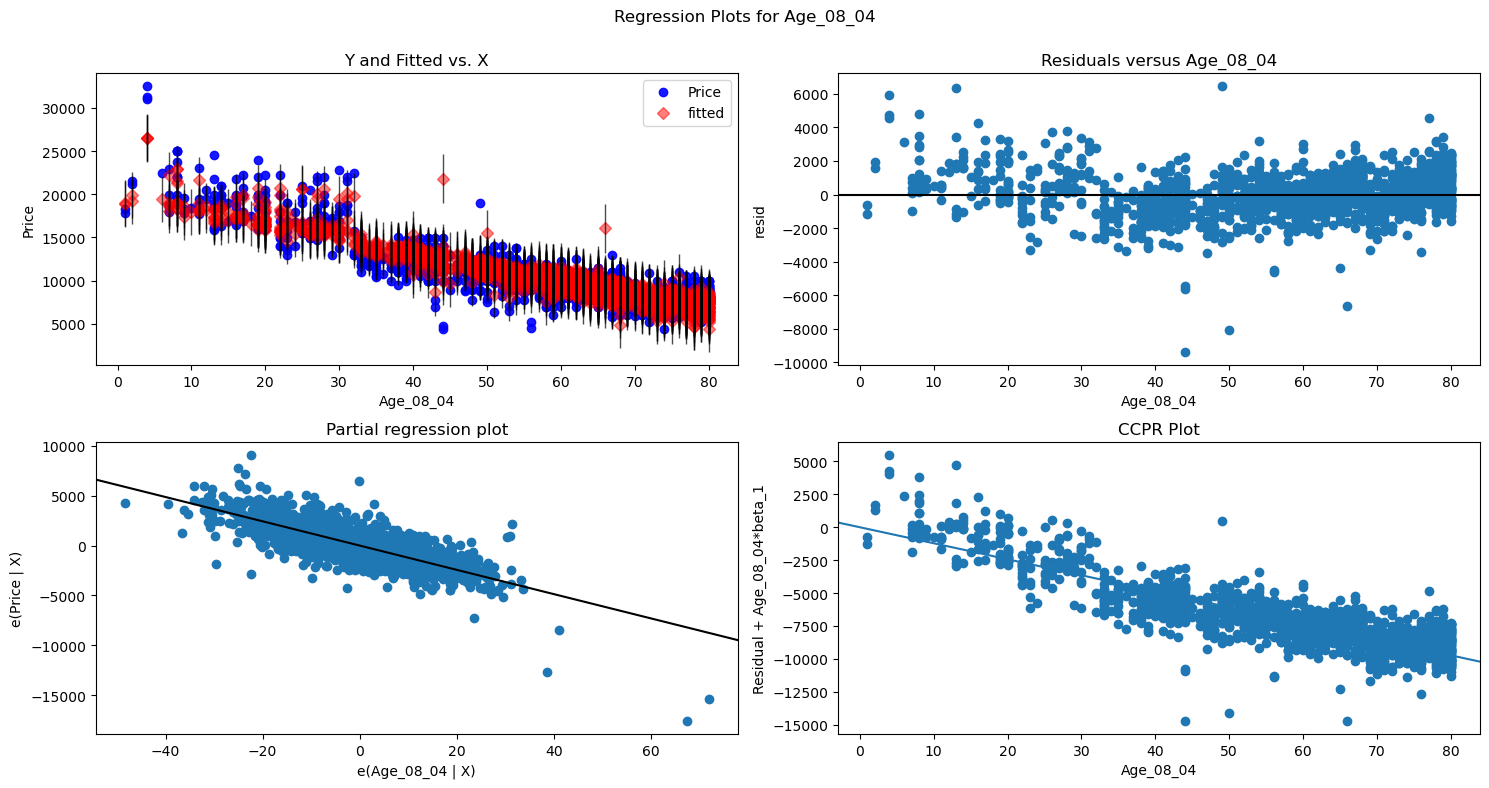

In [66]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(modelt,'Age_08_04',fig=fig)
plt.show()

eval_env: 1


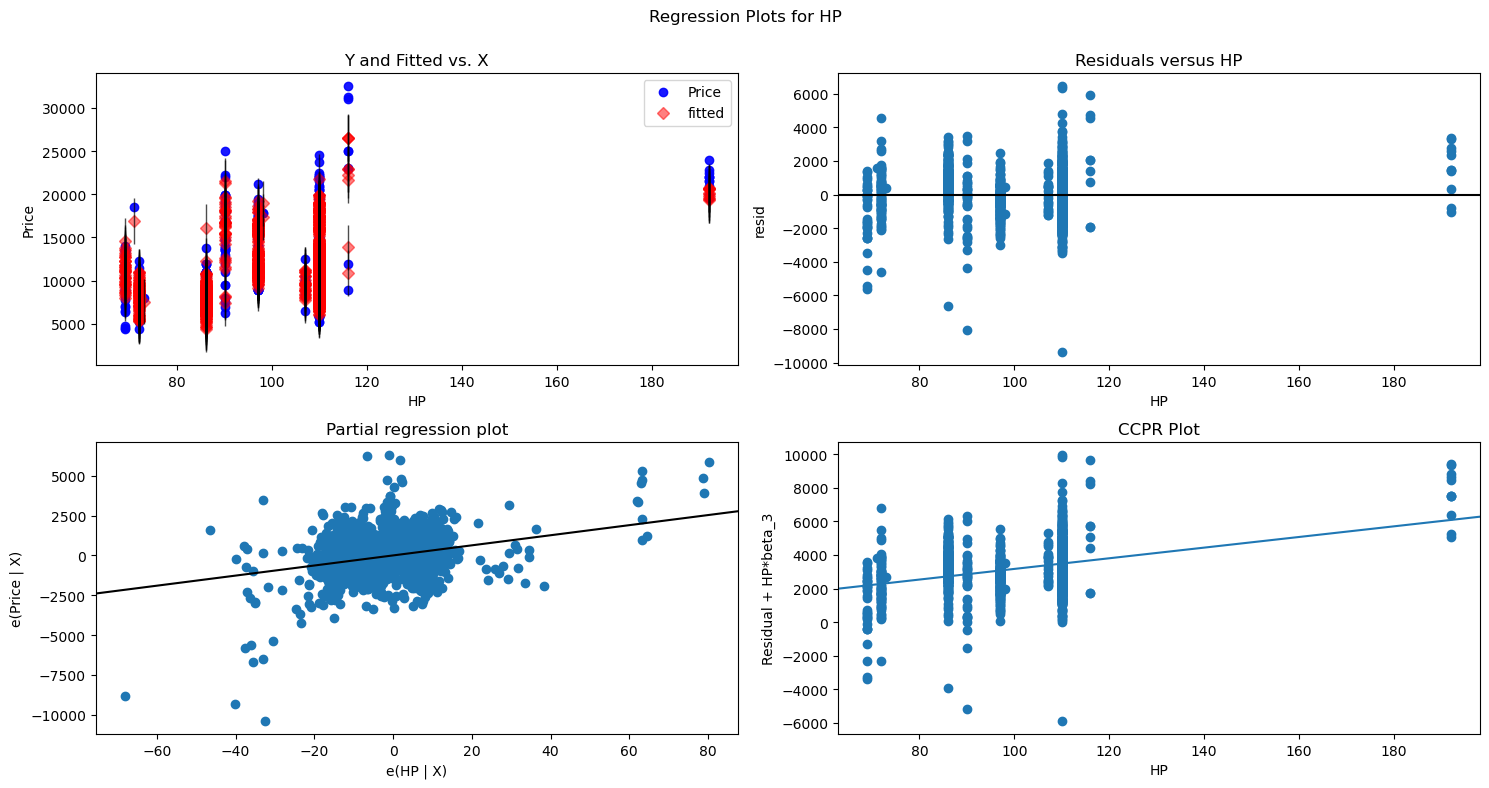

In [67]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(modelt,'HP',fig=fig)
plt.show()

eval_env: 1


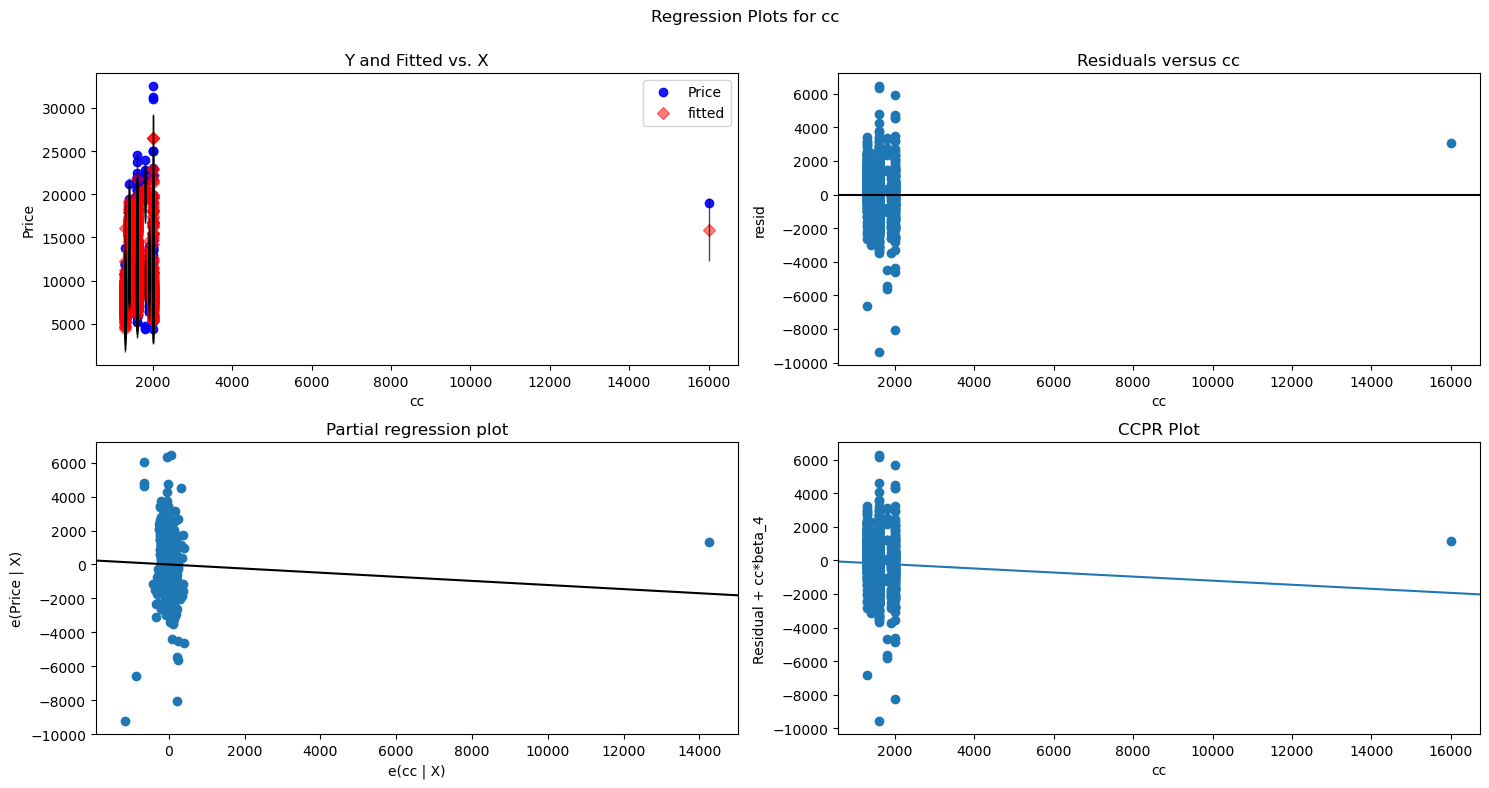

In [68]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(modelt,'cc',fig=fig)
plt.show()

eval_env: 1


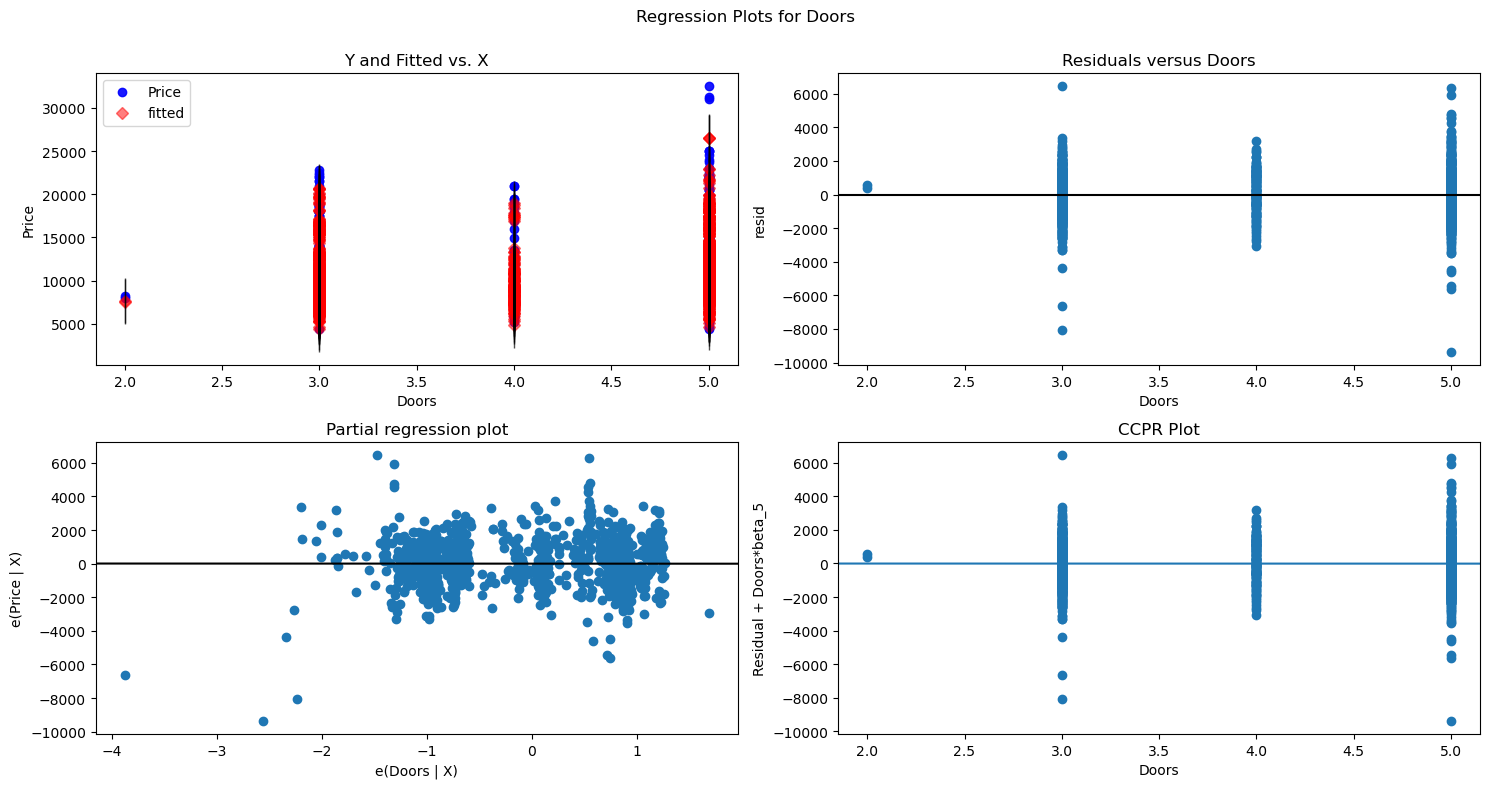

In [69]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(modelt,'Doors',fig=fig)
plt.show()

eval_env: 1


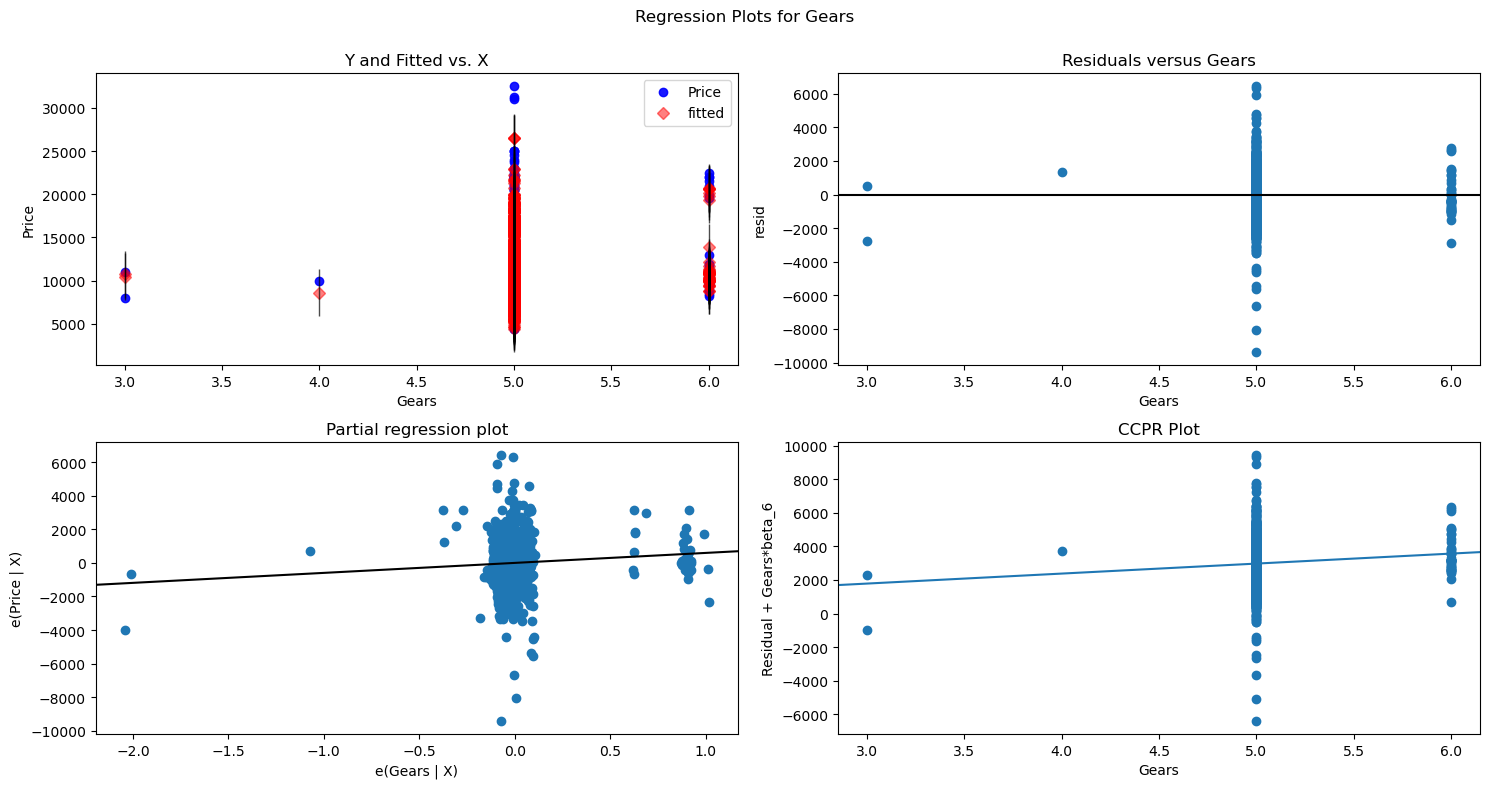

In [70]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(modelt,'Gears',fig=fig)
plt.show()

eval_env: 1


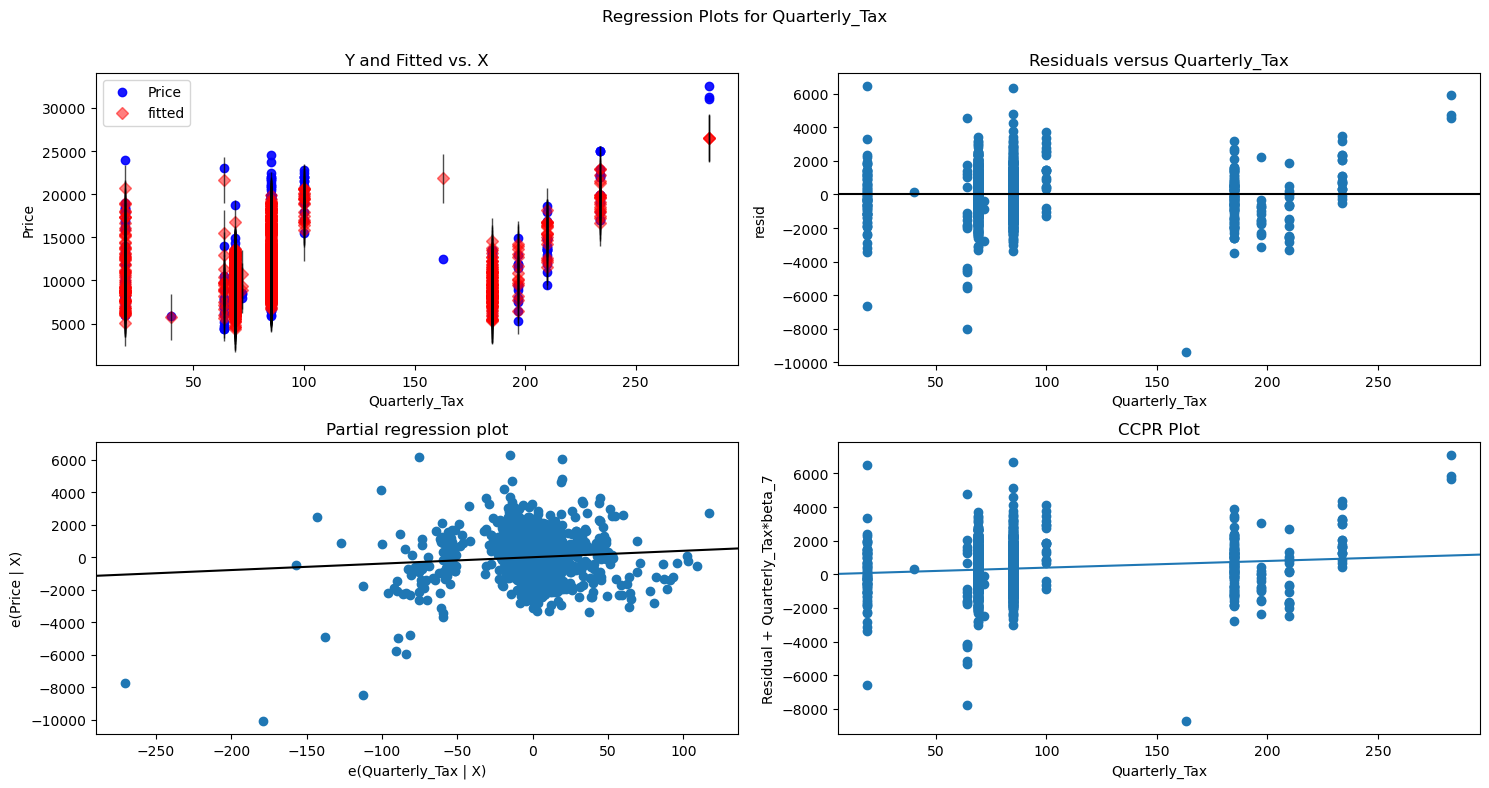

In [71]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(modelt,'Quarterly_Tax',fig=fig)
plt.show()

eval_env: 1


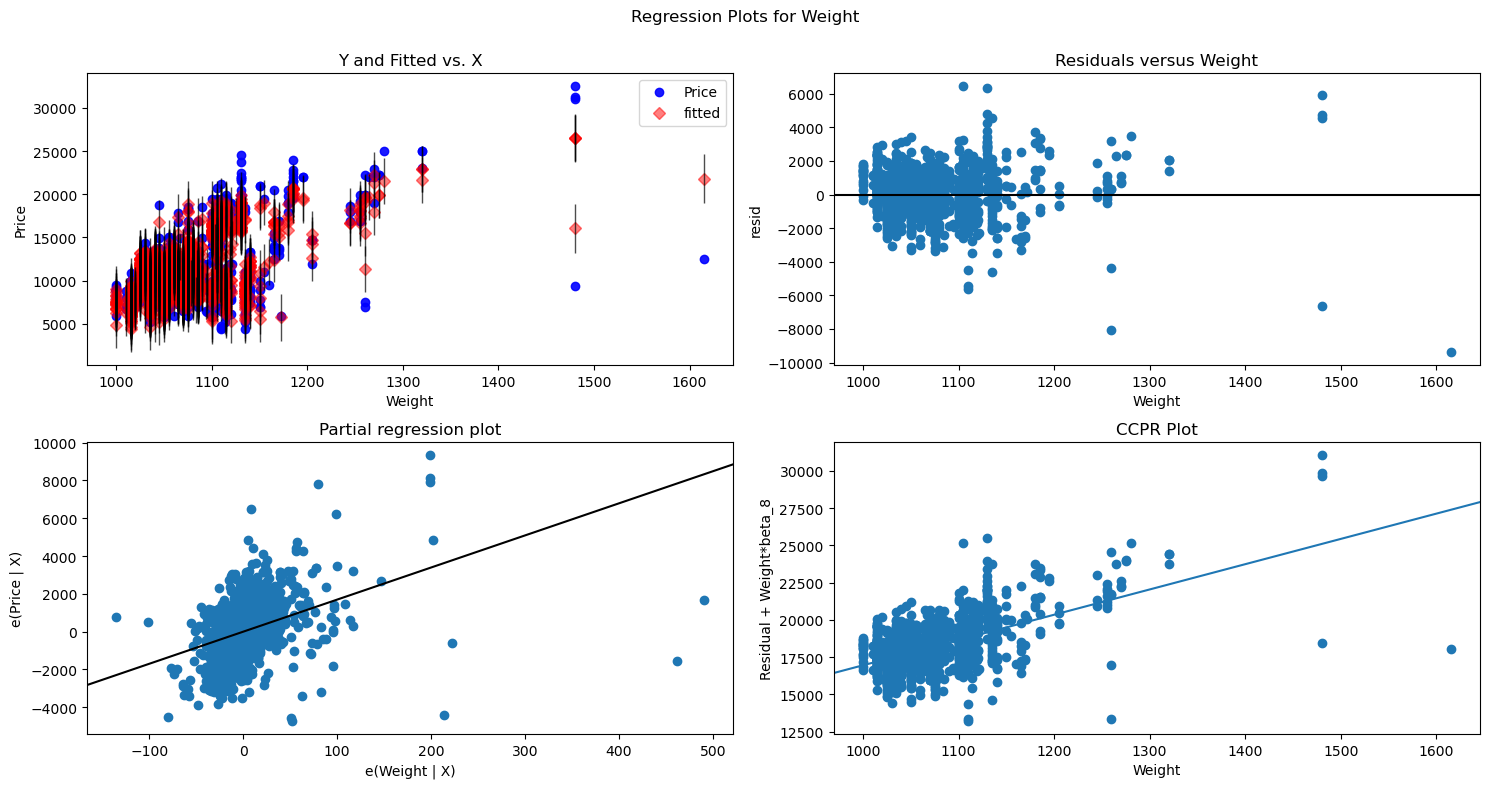

In [72]:
fig = plt.figure(figsize = (15,8))
sm.graphics.plot_regress_exog(modelt,'Weight',fig=fig)
plt.show()

# Model Diagnostics using Cook's distance

In [73]:
(c,_) = modelt.get_influence().cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

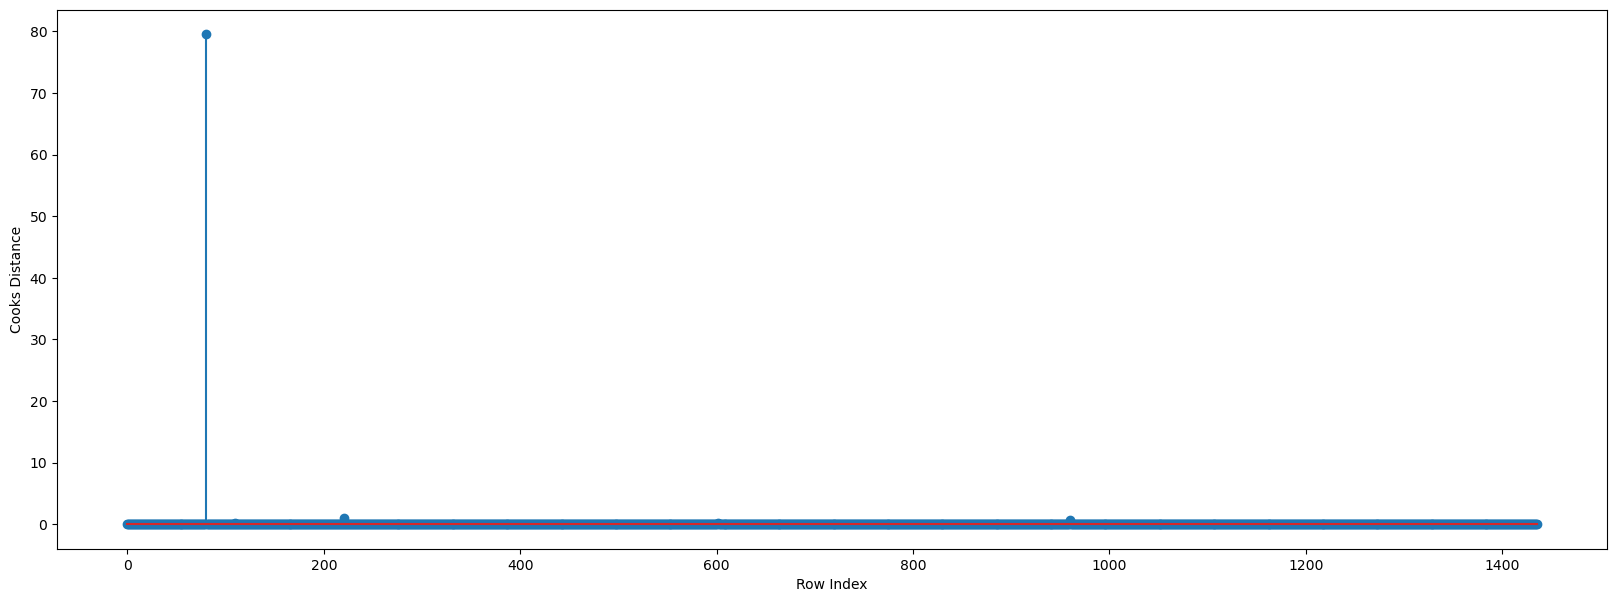

In [74]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [75]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 79.52010624139909)

# Improving model

In [77]:
toyota1 = toyota.copy()
toyota1

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,1,0,1,1,1,0,0,0
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,0,1,0,0,1,1,0,0,0
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,0,1,0,0,0,1,0,0,0
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,0,1,0,0,0


In [79]:
# Removing the influencers

toyota2 = toyota1.drop(toyota1.index[[80]],axis=0).reset_index(drop = True)
toyota2

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,1,0,1,1,1,0,0,0
1431,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,0,1,0,0,1,1,0,0,0
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,0,1,0,0,0,1,0,0,0
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,0,1,0,0,0


In [84]:
# Final Model

while np.max(c)>0.5 :
    modelt=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota2).fit()
    (c,_)=modelt.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota2=toyota2.drop(toyota2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota2
else:
    final_modelt=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota2).fit()
    final_modelt.rsquared , final_modelt.aic
    print(f'Improved model accuracy is {final_modelt.rsquared} from {modelt.rsquared}')

Improved model accuracy is 0.8894191849749751 from 0.8851845904421738


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
# toyota['Model'] = toyota['Model'].apply(lambda x: x.strip())

In [6]:
toyota

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,1,0,1,1,1,0,0,0
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,0,1,0,0,1,1,0,0,0
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,0,1,0,0,0,1,0,0,0
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,0,1,0,0,0


In [8]:
df = toyota.drop(['Fuel_Type','Color'], axis = 1)
df

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90,1,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,90,1,0,2000,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,90,1,0,2000,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,90,0,0,2000,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,90,0,0,2000,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,86,1,0,1300,...,1,1,1,0,1,1,1,0,0,0
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,0,0,1,1,0,0,0
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,86,0,0,1300,...,0,0,1,0,0,0,1,0,0,0
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,0,0,0,1,0,0,0


In [9]:
df1 = df.drop(['Price'],axis=1)
df1

,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,10,2002,46986,90,1,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,10,2002,72937,90,1,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,9,2002,41711,90,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,7,2002,48000,90,0,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,30,3,2002,38500,90,0,0,2000,3,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,69,12,1998,20544,86,1,0,1300,3,...,1,1,1,0,1,1,1,0,0,0
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,0,0,1,1,0,0,0
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,71,10,1998,17016,86,0,0,1300,3,...,0,0,1,0,0,0,1,0,0,0
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,0,0,0,1,0,0,0


In [10]:
X = df.loc[:,'Age_08_04':'Tow_Bar']
y = df['Price']
X

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,23,10,2002,46986,90,1,0,2000,3,4,...,1,1,1,0,0,0,1,0,0,0
1,23,10,2002,72937,90,1,0,2000,3,4,...,1,0,1,0,0,0,1,0,0,0
2,24,9,2002,41711,90,1,0,2000,3,4,...,0,0,1,0,0,0,1,0,0,0
3,26,7,2002,48000,90,0,0,2000,3,4,...,0,0,1,0,0,0,1,0,0,0
4,30,3,2002,38500,90,0,0,2000,3,4,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,12,1998,20544,86,1,0,1300,3,4,...,1,1,1,0,1,1,1,0,0,0
1432,72,9,1998,19000,86,0,0,1300,3,4,...,0,0,1,0,0,1,1,0,0,0
1433,71,10,1998,17016,86,0,0,1300,3,4,...,0,0,1,0,0,0,1,0,0,0
1434,70,11,1998,16916,86,1,0,1300,3,4,...,0,0,0,0,0,0,1,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 101)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9087494234081902

In [47]:
pred = lr.predict(X_test)
pred

array([10094.03941319, 11687.21286804, 10869.45093561, 17920.17752287,
       10026.72757752, 15322.58412616, 15131.42482221, 10619.19526608,
       11260.5952519 ,  9417.22773408, 10875.18975153,  9190.66138609,
       16316.89089839, 15472.66719359, 11973.60484899, 10678.85052932,
        7358.95120577,  6605.97167764,  7301.00683832, 11425.82807241,
       10064.06906454,  9114.72543541, 13775.27157226,  7936.69063425,
        6724.63183765, 10835.19058605,  9047.95420895,  7942.79634014,
        9652.21353142, 15297.4560719 ,  8036.48020591,  9878.62386721,
        8659.88803849,  9932.57124005,  7980.20813148,  7150.41174634,
        9387.54364702,  8445.5153378 ,  7932.70013859,  5707.38017848,
        8672.14361006, 10012.64913541,  8751.00344685,  5685.96976121,
        8879.45443453, 16069.41602401,  9925.07170284, 12383.6360698 ,
       12509.06155628,  8038.59021435,  8444.88378361, 21605.42561821,
       11000.68664788,  8141.66102332, 14797.40034038, 13203.74095107,
      

In [91]:
# Prediction by using final model

age = int(input('age : '))
km = int(input('Enter KM : '))
hp = int(input('Enter HP : '))
cc = int(input('Enter CC : '))
doors = int(input('Enter doors : '))
gears = int(input('Enter gears : '))
quaterly_tax = int(input('Enter quaterly tax : '))
weight = int(input('Enter weight : '))


newt = pd.DataFrame({'Age_08_04':age, 'KM':km, 'HP': hp, 'cc':cc, 'Doors':doors, 'Gears':gears, 'Quarterly_Tax':quaterly_tax,'Weight':weight},index = [0])
print(newt)

pred_profitt = final_modelt.predict(newt)
print('=='*30)
print(f'The predicted pricee is {pred_profitt}')

age : 24
Enter KM : 59000
Enter HP : 95
Enter CC : 2450
Enter doors : 5
Enter gears : 6
Enter quaterly tax : 295
Enter weight : 1185
   Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0         24  59000  95  2450      5      6            295    1185
The predicted pricee is 0    15676.861829
dtype: float64


In [89]:
toyota['Weight']

0       1165
1       1165
2       1165
3       1165
4       1170
        ... 
1431    1025
1432    1015
1433    1015
1434    1015
1435    1114
Name: Weight, Length: 1436, dtype: int64